In [1]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [2]:
np.set_printoptions(precision=2, suppress=True)

# Load sample data

In [3]:
data = np.loadtxt('../data/curvefitting.txt', dtype=str, delimiter=' ')
data = data.astype(np.float64)

In [4]:
x = data[:, 0]
t = data[:, 1]

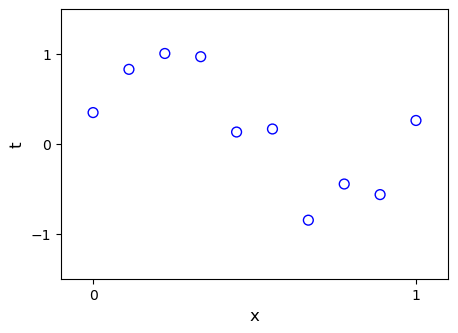

In [5]:
plt.figure(figsize=(5, 3.5))
plt.scatter(x, t, facecolors='none', edgecolors='b', s=50)
plt.xlim([-0.1, 1.1])
plt.ylim([-1.5, 1.5])
plt.xticks(ticks=[0, 1])
plt.yticks(ticks=[-1, 0, 1])
plt.xlabel('x', fontsize=12)
plt.ylabel('t', fontsize=12)
plt.show()

# Polynomial model with Gaussian noise

In [6]:
M = 9  # degree of the polynomial

In [7]:
# coefficients from table 1.2
w = np.array([0.35, 4.74, -0.77, -31.97, -3.89, 55.28, 41.32, -45.95, -91.53, 72.68])

In [8]:
x_grid = np.linspace(0, 1, 20)

In [9]:
poly = PolynomialFeatures(degree=M, include_bias=True)
X = poly.fit_transform(x_grid.reshape(-1, 1))

In [10]:
X.shape

(20, 10)

In [11]:
y_grid = X @ w

In [12]:
def model(x, w):
    """wrapping a polynomial model into a function
    
    Args:
        x (np.array, float): input data points
        w (np.array, float): coefficients of a polynomial model
    Returns:
        y (np.array, float): predicted output, same size as x
    """
    poly = PolynomialFeatures(degree=M, include_bias=True)
    X = poly.fit_transform(x.reshape(-1, 1))
    y = X @ w
    return y

In [13]:
beta = 10.0  # precision parameter of the Gaussian noise
sigma = np.sqrt(1. / beta)

In [14]:
t_grid = norm(loc=y_grid, scale=sigma).rvs()

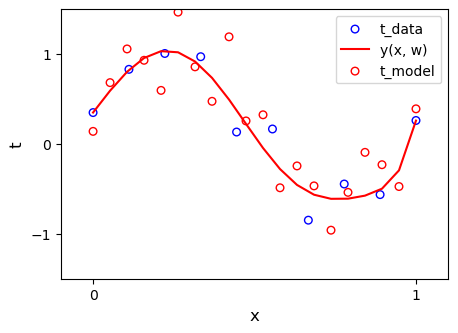

In [15]:
plt.figure(figsize=(5, 3.5))
plt.scatter(x, t, facecolors='none', edgecolors='b', s=30, label='t_data')
plt.plot(x_grid, y_grid, 'r-', label='y(x, w)')
plt.scatter(x_grid, t_grid, facecolors='none', edgecolors='r', s=30, label='t_model')
plt.xlim([-0.1, 1.1])
plt.ylim([-1.5, 1.5])
plt.xticks(ticks=[0, 1])
plt.yticks(ticks=[-1, 0, 1])
plt.xlabel('x', fontsize=12)
plt.ylabel('t', fontsize=12)
plt.legend()
plt.show()

In [16]:
N = len(x)
N

10

In [17]:
y = model(x, w)

In [18]:
sigma2_ML = np.sum((y - t) ** 2) / N

In [19]:
beta_ML = 1. / sigma2_ML
beta_ML  # ML estimation of beta (1.63)

31.226510884095337

## Interactive widget to test the precision parameter $\beta$

In [20]:
def plot_results(beta=1):
    sigma = np.sqrt(1. / beta)
    t_grid = norm(loc=y_grid, scale=sigma).rvs()
    plt.figure(figsize=(5, 3.5))
    plt.scatter(x, t, facecolors='none', edgecolors='b', s=30, label='t_data')
    plt.plot(x_grid, y_grid, 'r:', label='y(x, w)')
    plt.scatter(x_grid, t_grid, facecolors='none', edgecolors='r', s=30, label='t_model')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-1.5, 1.5])
    plt.xticks(ticks=[0, 1])
    plt.yticks(ticks=[-1, 0, 1])
    plt.xlabel('x', fontsize=12)
    plt.ylabel('t', fontsize=12)
    plt.legend(loc='upper right')
    plt.show()

In [21]:
interact(
    plot_results,
    beta = (1, 100, 1),
);

interactive(children=(IntSlider(value=1, description='beta', min=1), Output()), _dom_classes=('widget-interact…